# Common Distributions, Priors, and Likelihoods
The ones that are most used by Bayesian practitioners

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from scipy import special

In [2]:
az.style.use("arviz-darkgrid")

# There are many distributions
* We'll cover the most typically used ones here
  * Just these few cover the vast majority of Bayesian work
  * Any of the more specialized ones are easy to learn if you end up needing them

In [3]:
def plot_format(x_label="x"):
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel('Plausibility', fontsize=20)
    plt.yticks([])
    plt.ylim(0)
    plt.legend()

In [4]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)

# Discrete Distributions
Great for

* Counts
* Binary Outcomes (which are just counts)
* Categories (which are also just counts)

# Bernoulli
* Binary outcomes as we've seen in AB Testing and in this lesson
* Plotted here with lines so we can see more than one

Typically as a likelihood

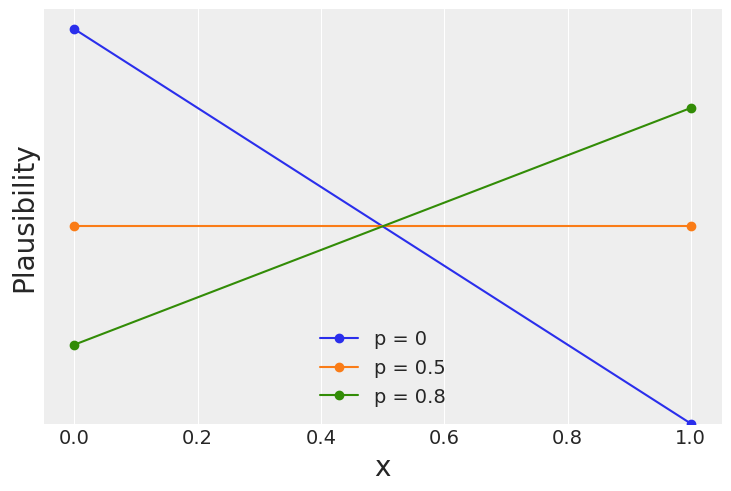

In [5]:
x = [0, 1]
for p in [0, 0.5, 0.8]:
    pmf = stats.bernoulli.pmf(x, p)
    plt.plot(x, pmf, '-o', label='p = {}'.format(p))
plot_format();

# Bernoulli Example
* What's the probability of rain today?

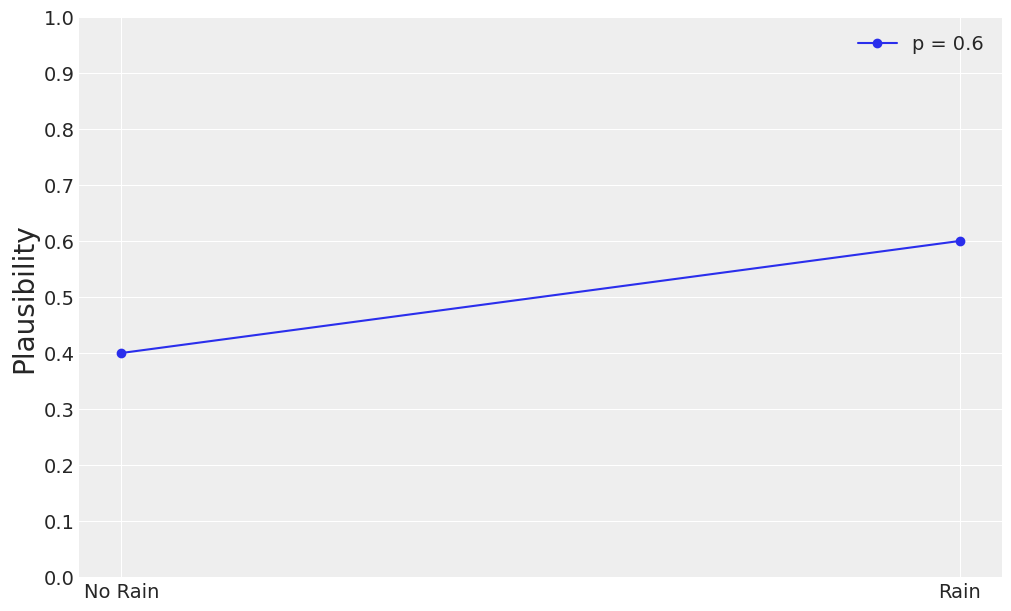

In [6]:
x = [0, 1]
p=.6
pmf = stats.bernoulli.pmf(x, .6)
plt.plot(x, pmf, '-o', label='p = {}'.format(p));
plot_format("")
plt.xticks(x, ["No Rain", "Rain"])
plt.yticks(np.arange(0, 1.1,.1));

# Binomial
* Count of "success" in a fixed number of trials
* Proportion in a group

Typically as a likelihood

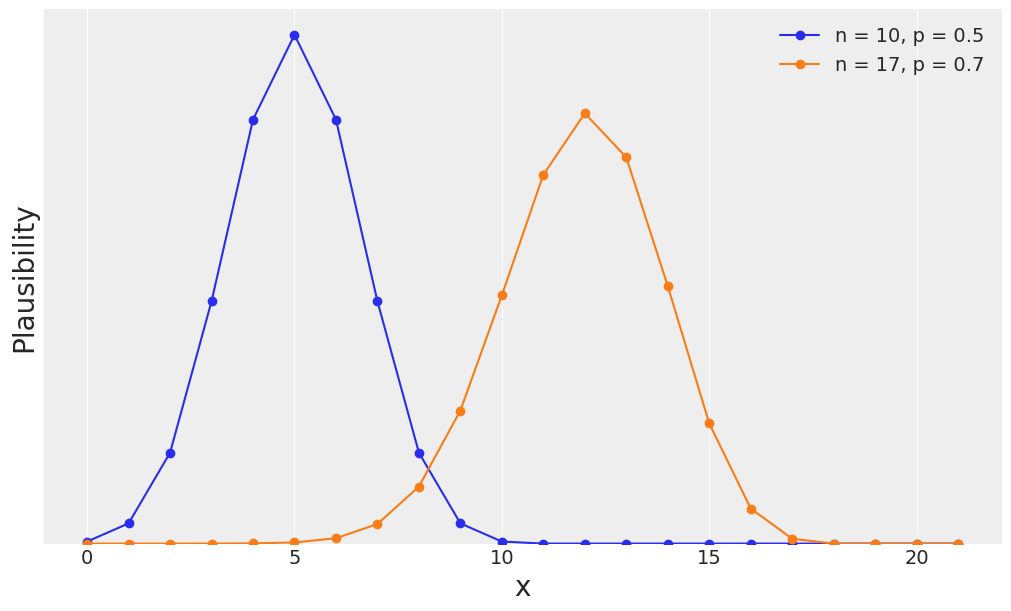

In [7]:
x = np.arange(0, 22)
ns = [10, 17]
ps = [0.5, 0.7]
for n, p in zip(ns, ps):
    pmf = stats.binom.pmf(x, n, p)
    plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plot_format()

# Binomial Example
* We have 10 users visiting our website, our true conversion rate is 70%. How many successful conversions do we expect to see?

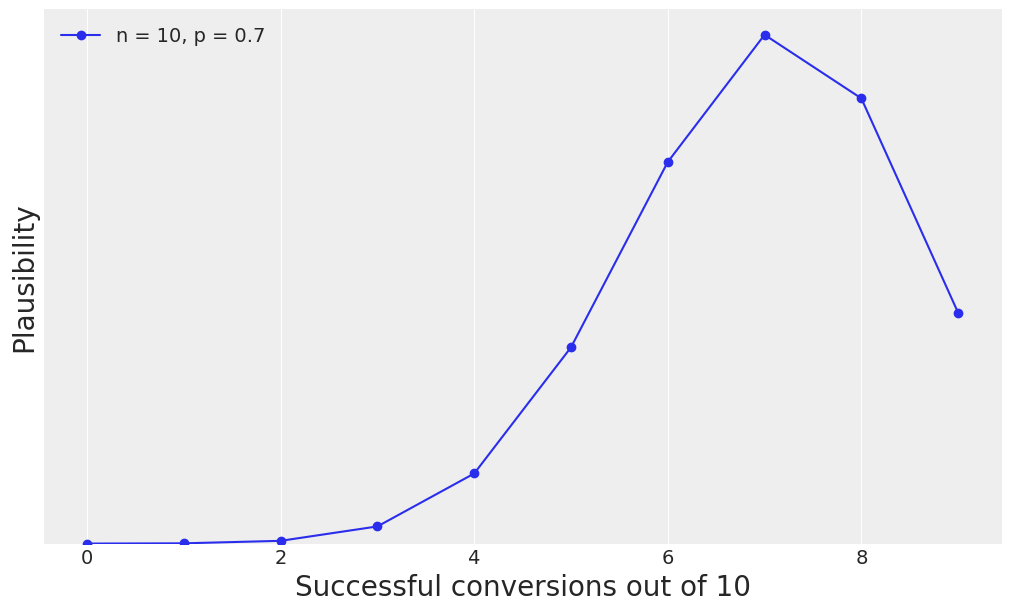

In [8]:
x = np.arange(0, 10)
n = 10
p = 0.7

pmf = stats.binom.pmf(x, n, p)
plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plot_format("Successful conversions out of 10");

# Categorical
* Counts of occurrences from fixed set of categories

Typically as a prior or a likelihood

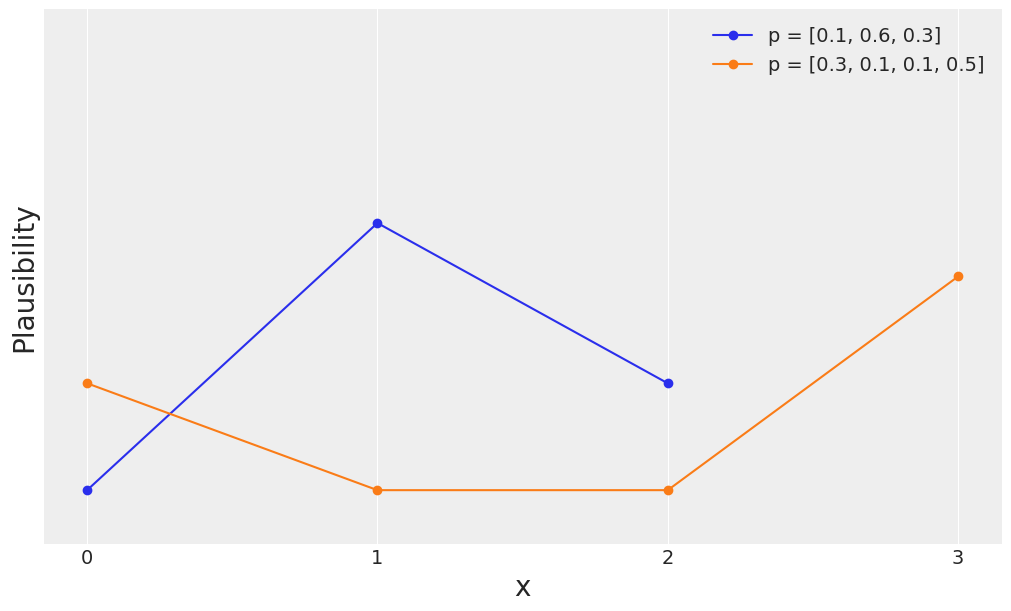

In [9]:
ps = [[0.1, 0.6, 0.3], [0.3, 0.1, 0.1, 0.5]]
for p in ps:
    x = range(len(p))
    plt.plot(x, p, '-o', label='p = {}'.format(p))
plt.xticks(np.arange(4))
plt.ylim([0,1])
plot_format();

# Categorical Example
* Which political party will a voter choose in an election?

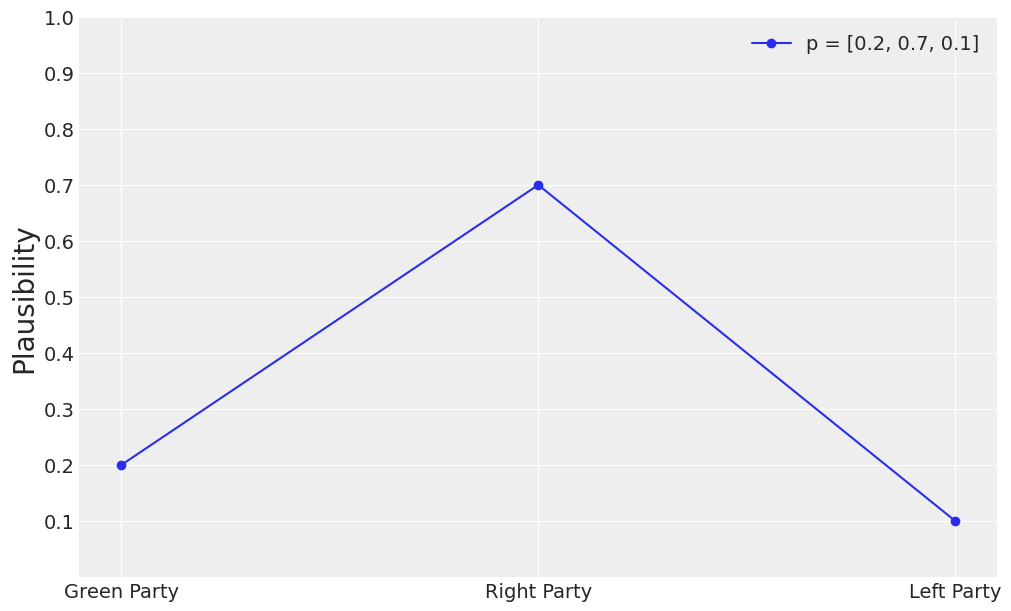

In [10]:
p = [0.2, 0.7, 0.1]
x = range(len(p))
plt.plot(x, p, '-o', label='p = {}'.format(p))
plt.xticks(x, ["Green Party", "Right Party", "Left Party"])
plt.ylim([0,1])
plot_format("")
plt.yticks(np.arange(.1, 1.1,.1));


# Negative Binomial
* Number of failures until N number of successes
* Count of events
* Like Binomial but without upper limit

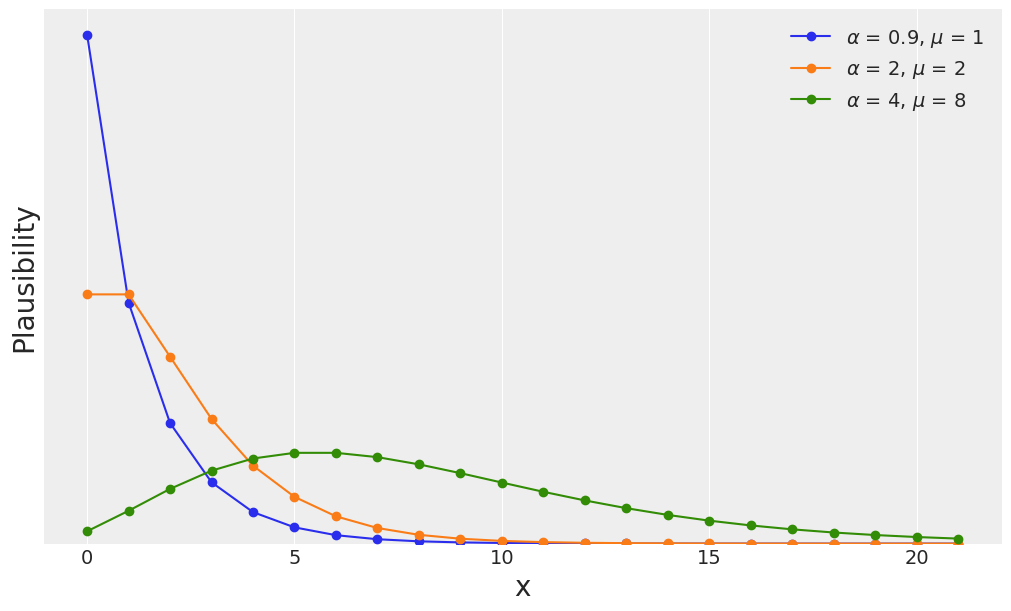

In [11]:
def NegBinom(a, m, x):
    pmf = special.binom(x + a - 1, x) * (a / (m + a))**a * (m / (m + a))**x
    return pmf

x = np.arange(0, 22)
alphas = [0.9, 2, 4]
mus = [1, 2, 8]

for a, m in zip(alphas, mus):
    pmf = NegBinom(a, m, x)
    plt.plot(x, pmf, '-o', label=r'$\alpha$ = {}, $\mu$ = {}'.format(a, m))

plot_format();

Text(0, 0.5, '')

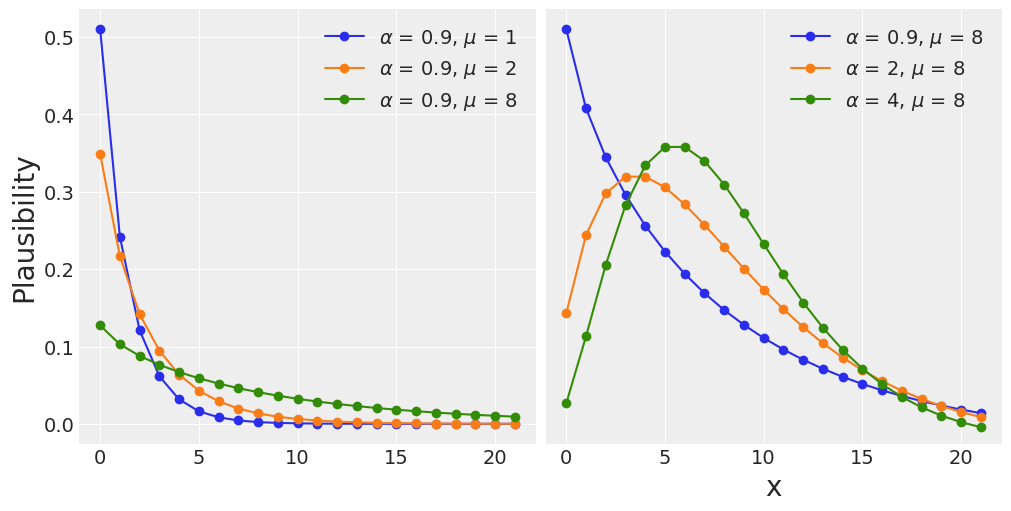

In [12]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

def NegBinom(a, m, x):
    pmf = special.binom(x + a - 1, x) * (a / (m + a))**a * (m / (m + a))**x
    return pmf

x = np.arange(0, 22)
alphas = [0.9, 2, 4]
mus = [1, 2, 8]

for a, m in zip(alphas, mus):
    a = .9
    pmf = NegBinom(a, m, x)
    axes[0].plot(x, pmf, '-o', label=r'$\alpha$ = {}, $\mu$ = {}'.format(a, m))
    axes[0].legend()


for a, m in zip(alphas, mus):
    m = 8
    pmf = NegBinom(a, m, x)
    axes[1].plot(x, pmf, '-o', label=r'$\alpha$ = {}, $\mu$ = {}'.format(a, m))

plot_format()
axes[0].set_ylabel('Plausibility', fontsize=20)
axes[1].set_ylabel('')


# Negative Binomial Example
* What is the number of sales made on a single day?

Typically used as a likelihood

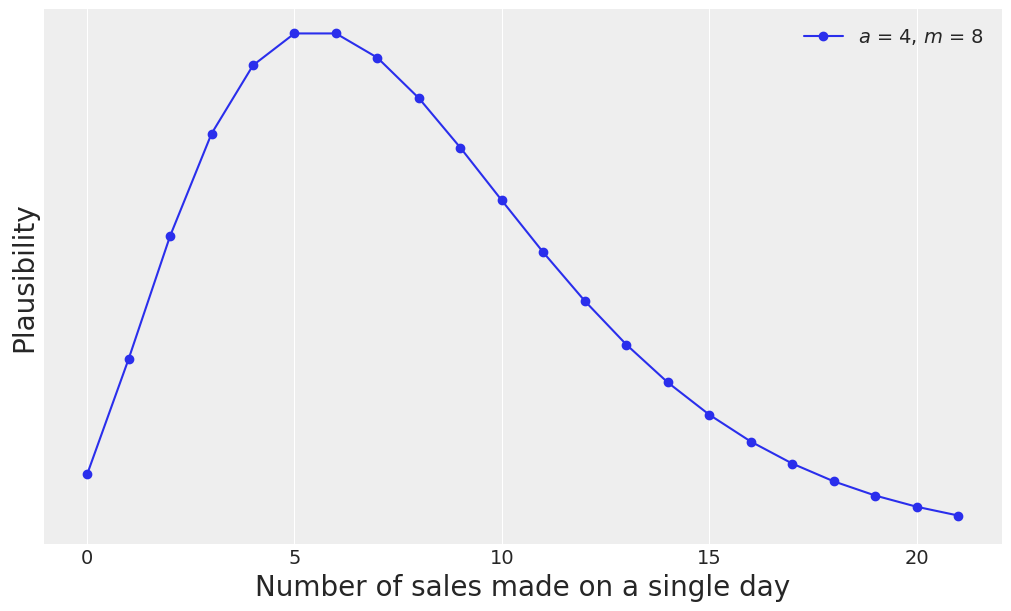

In [13]:
x = np.arange(0, 22)
a = 4
m = 8

pmf =  NegBinom(a, m, x)
plt.plot(x, pmf, '-o', label=r'$a$ = {}, $m$ = {}'.format(a, m))
plot_format("Number of sales made on a single day");

# Continuous Distributions

Great for
* Outcomes that can take on any value, not just a fixed set of outcomes

# Beta
Great for things that are bounded for instance
* 0 to 1 like probabilities 
* 0% to 100% bounded percentage

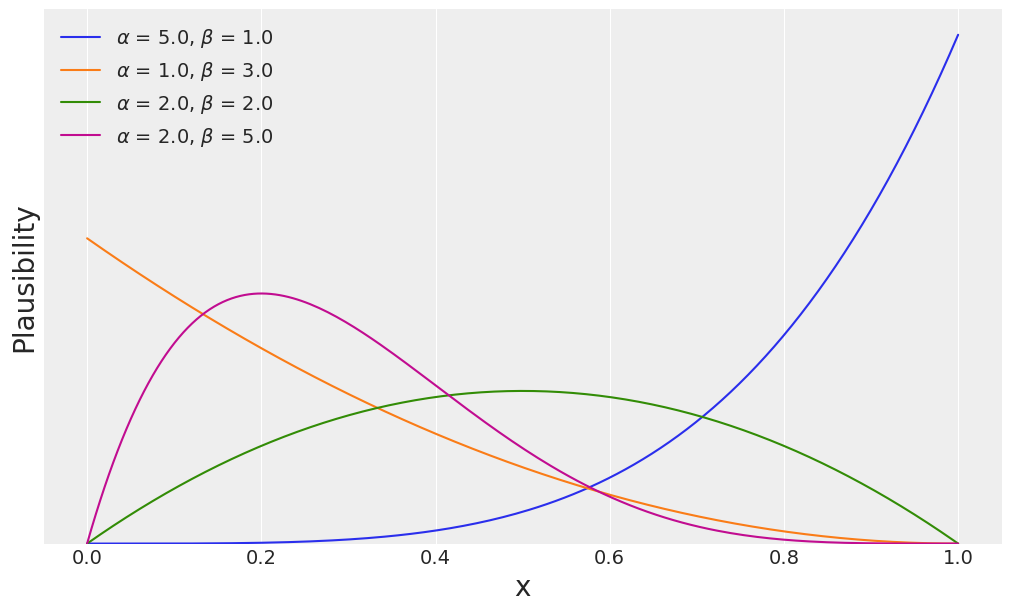

In [14]:
x = np.linspace(0, 1, 200)
alphas = [5., 1., 2., 2.]
betas = [1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plot_format()


# Beta Example
* Probability of a user converting

Typically used as a prior

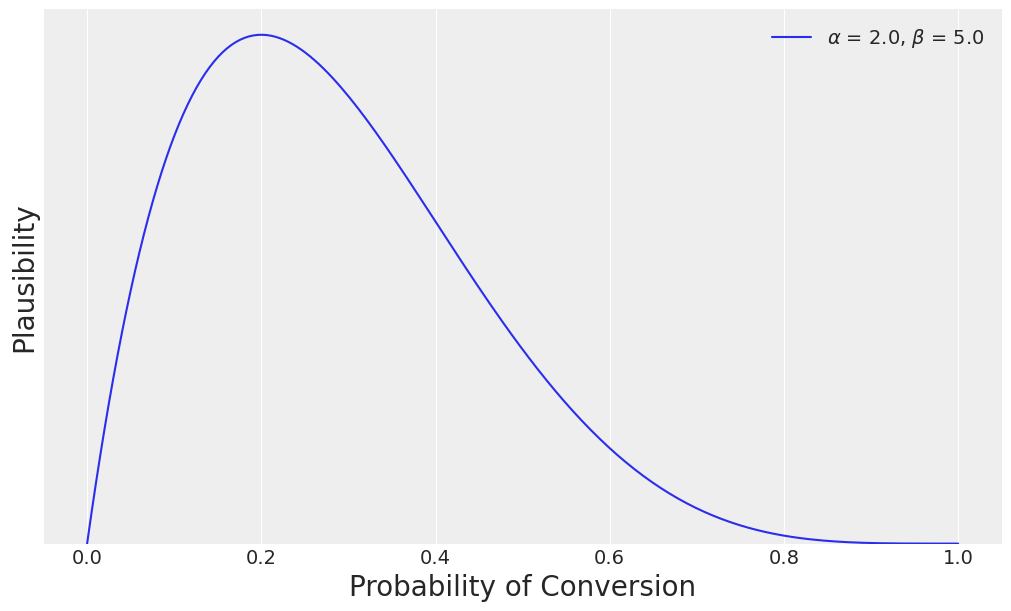

In [15]:
x = np.linspace(0, 1, 200)
alpa = 1
betas = 2
pdf = stats.beta.pdf(x, a, b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plot_format("Probability of Conversion");

# Normal
* Symmetry around mean is very common in nature
* Very popular due to Frequentist statistics
* Still great in Bayesian context though the point above is not as necessary for us

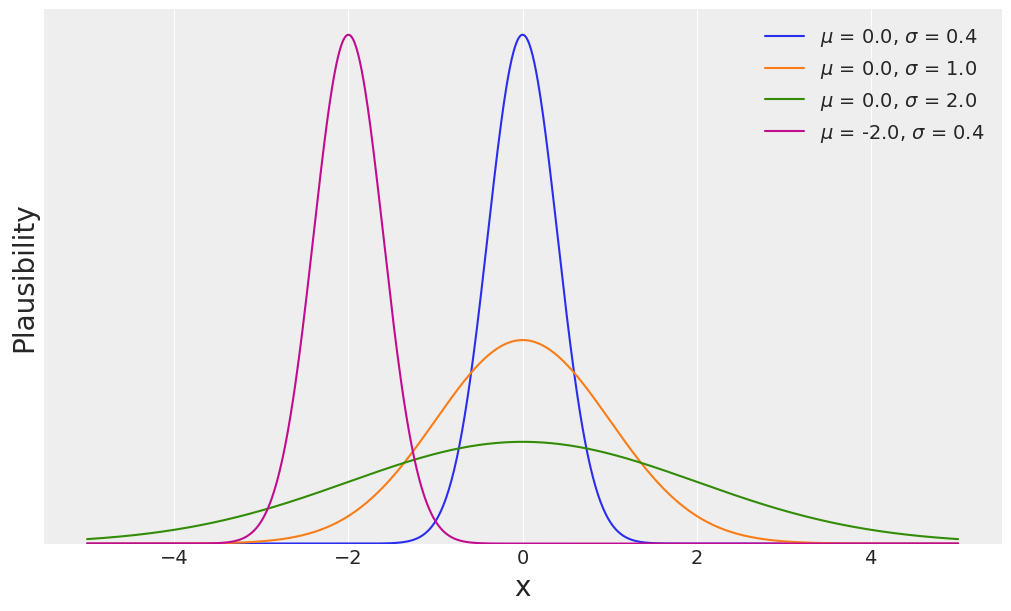

In [16]:
x = np.linspace(-5, 5, 1000)
mus = [0., 0., 0., -2.]
sigmas = [0.4, 1., 2., 0.4]
for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plot_format();


# Normal Example
* What is the weight of a random American Football player?

Typically used as a prior or likelihood, particularly in regressions

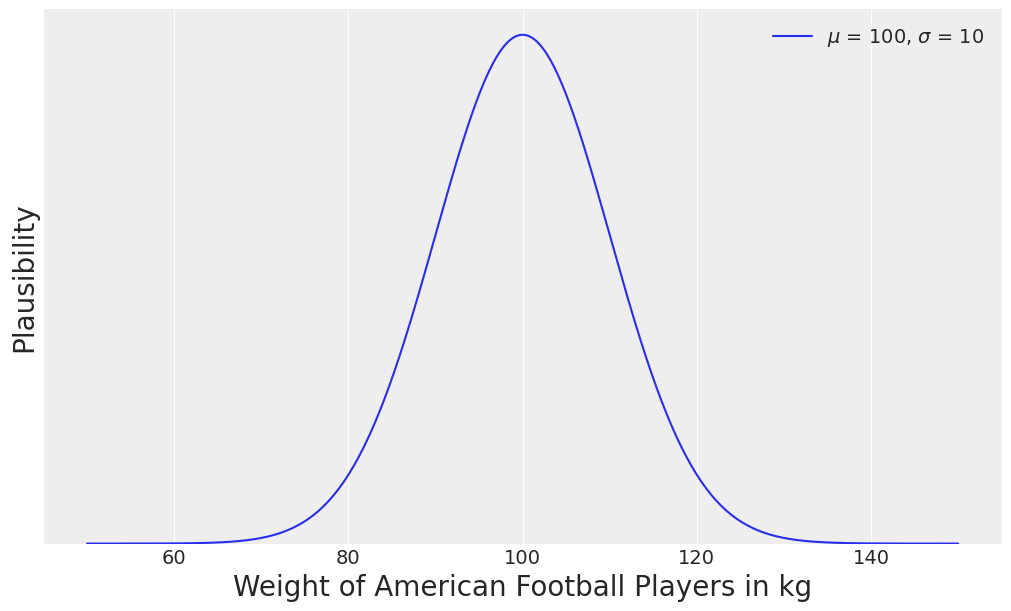

In [17]:
x = np.linspace(50, 150, 1000)
mu= 100
sigma = 10
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plot_format("Weight of American Football Players in kg");


# Student T
* Like the Normal distribution but with heavier tails
  * These tails are add robustness against outliers

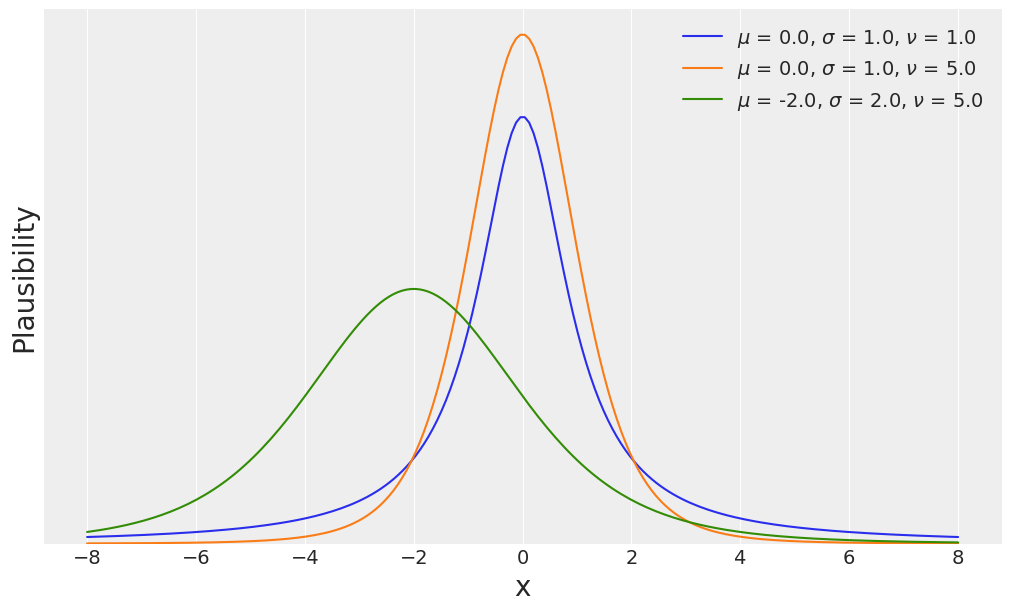

In [18]:
x = np.linspace(-8, 8, 200)
mus = [0., 0., -2.]
sigmas = [1., 1., 2.]
dfs = [1., 5., 5.]
for mu, sigma, df in zip(mus, sigmas, dfs):
    pdf = stats.t.pdf(x, df, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plot_format();


# Student T Example
* What is the weight of a random adult in the general population?

Typically used as a prior or likelihood

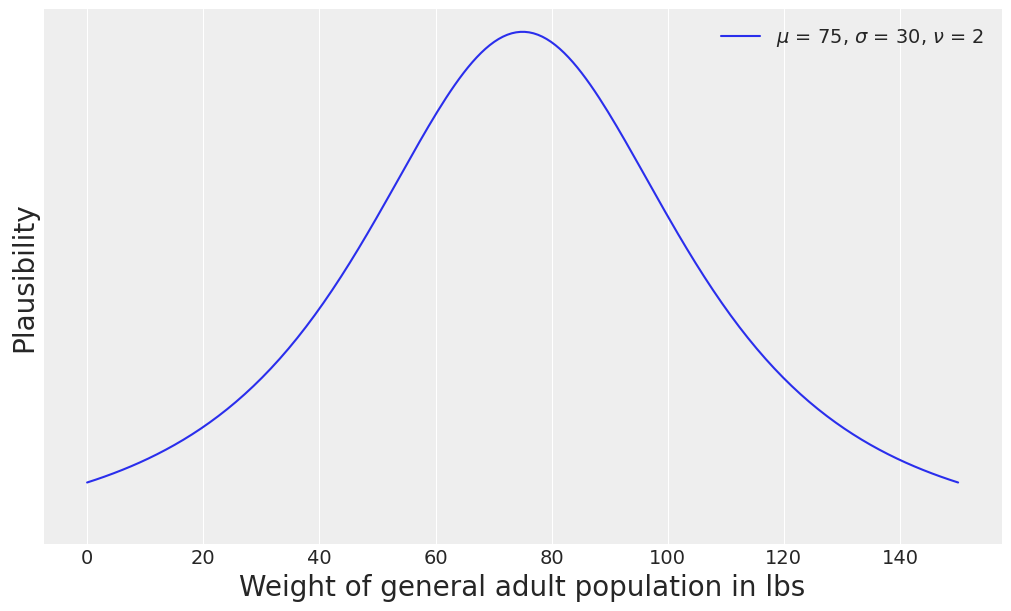

In [19]:
x = np.linspace(0, 150, 200)
mu = 75
sigma = 30
df = 2
pdf = stats.t.pdf(x, df, loc=mu, scale=sigma)
plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plot_format("Weight of general adult population in lbs");

# Half Versions of Normal, Student T
* Same idea but for things that can only be positive
  * Examples including estimating parameters that can be positive like variance or standard deviation

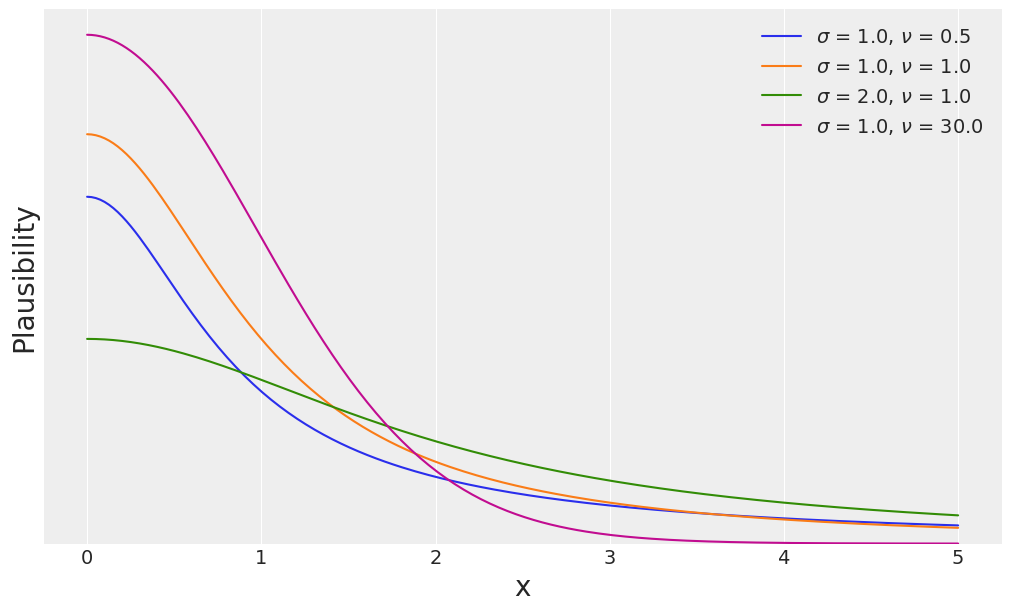

In [20]:
x = np.linspace(0, 5, 200)
sigmas = [1., 1., 2., 1.]
nus = [.5, 1., 1., 30.]
for sigma, nu in zip(sigmas, nus):
    pdf = stats.t.pdf(x, df=nu, loc=0, scale=sigma)
    plt.plot(x, pdf, label=r'$\sigma$ = {}, $\nu$ = {}'.format(sigma, nu))
plot_format();

# Half Student T Example
* What are possible values for standard deviation parameter?

Typically used as a prior

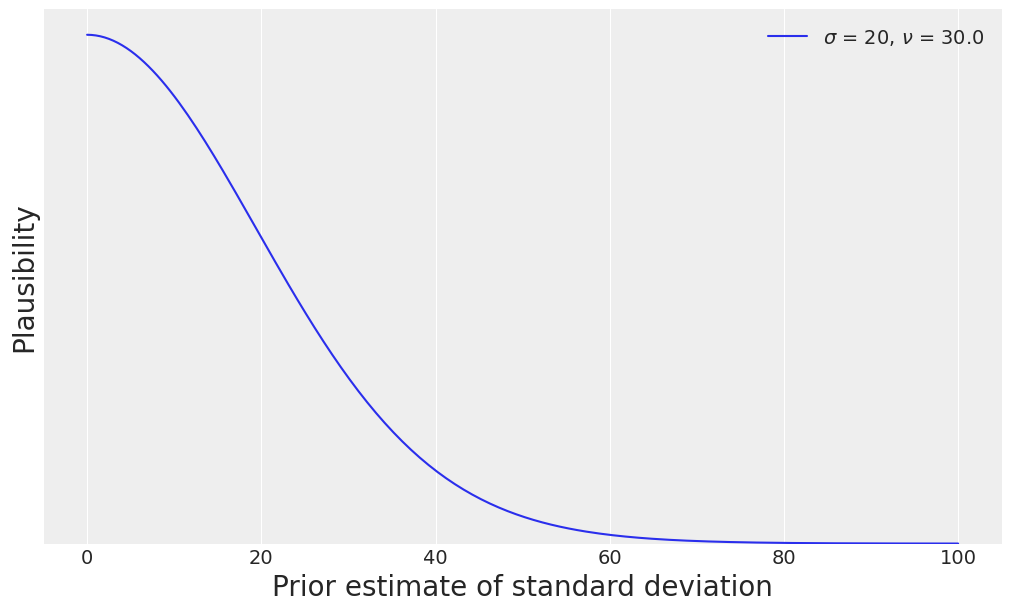

In [21]:
x = np.linspace(0, 100, 200)
sigma = 20
nus = 5
pdf = stats.t.pdf(x, df=nu, loc=0, scale=sigma)
plt.plot(x, pdf, label=r'$\sigma$ = {}, $\nu$ = {}'.format(sigma, nu))
plot_format("Prior estimate of standard deviation");

# Section Recap
* The distributions covered here will be nearly all you need
* There are many more distributions but it's easy enough to learn them as you go